Sử dụng mạng CNN được đào tạo sẵn - MobileNetV2

In [1]:
from tensorflow.keras.applications import MobileNetV2

model = MobileNetV2(weights = 'imagenet')

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
import numpy as np
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image

x = image.load_img('arctic-fox-main.jpg', target_size=(224, 224))
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

In [5]:
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


In [8]:
from tensorflow.keras.applications.vgg16 import decode_predictions
decoded_predictions = decode_predictions(y, top=5)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


In [9]:
print(decoded_predictions)

[[('n03729826', 'matchstick', 0.081016704), ('n04548280', 'wall_clock', 0.0548669), ('n04153751', 'screw', 0.042698503), ('n04372370', 'switch', 0.031269014), ('n04525038', 'velvet', 0.019660454)]]


Phân loại với các mô hình được đào tạo từ trước

In [ ]:
from tensorflow.keras.applications import ResNet50V2
model = ResNet50V2(weights = 'imagenet')
model.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 25,613,800 (97.71 MB)

 Trainable params: 25,568,360 (97.54 MB)

 Non-trainable params: 45,440 (177.50 KB)

Sử dụng mô hình để dựa đoán hình ảnh cáo bắc cực

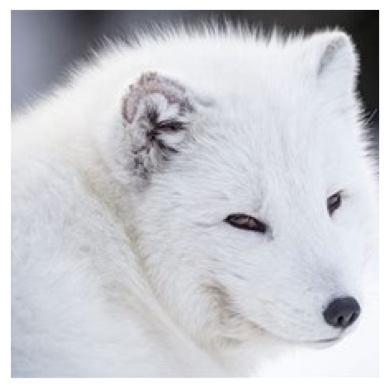

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

x = image.load_img('Data/samples/arctic_fox/arctic_fox_140.jpeg',
                   target_size=(224, 224))

plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [ ]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions

x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

y = model.predict(x)
decode_predictions(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


[[('n02120079', 'Arctic_fox', 0.9999944),
  ('n02114548', 'white_wolf', 4.7599847e-06),
  ('n02119789', 'kit_fox', 2.3306873e-07),
  ('n02442845', 'mink', 1.2460312e-07),
  ('n02111889', 'Samoyed', 1.1914389e-07)]]

Dự đoán hình ảnh hải mã

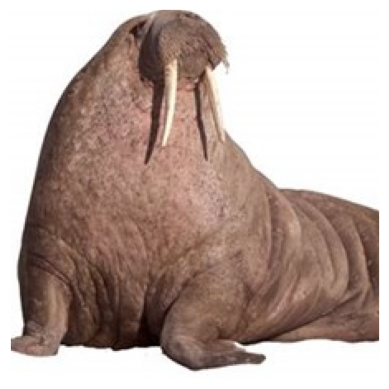

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

x = image.load_img('Data/samples/walrus/walrus_143.png',
                   target_size=(224, 224))

plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [ ]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

y = model.predict(x)
decode_predictions(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


[[('n02454379', 'armadillo', 0.6375801),
  ('n01704323', 'triceratops', 0.16057104),
  ('n02113978', 'Mexican_hairless', 0.07795143),
  ('n02398521', 'hippopotamus', 0.022283802),
  ('n01817953', 'African_grey', 0.016944185)]]

Do tỉ lệ chính xác của Hà mã khá thấp ( vì chưa được huấn luyện để nhận biết hải mã ) nên ta sẽ áp dụng học chuyển giao cho mô hình được đào tạo từ trước này và cho nó nhận dạng thêm hải mã

Đầu tiên ta chỉ load các lớp bottleneck thôi, ko load các lớp phân loại từ các mô hình tiền đào tạo.

In [ ]:
base_model = ResNet50V2(weights='imagenet', include_top=False)

Cách 1: Thêm các lớp phân loại mới vào mô hình cơ sở và thiệt lập các thuộc tính trainable để False các tham số như trọng số, độ lệch, hạt nhân tích chập sẽ không được đào tạo ( nhầm giữ nguyên các trọng số này để trích xuất tính năng, mình chỉ cần train khúc phân loại mới phía sau ).

In [ ]:
# for layer in base_model.layers:
#     layer.trainable = False

# model = Sequential()
# model.add(base_model)
# model.add(Flatten())  # Làm phẳng đầu ra của base_model
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(3, activation='softmax'))
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(x, y, validation_split=0.2, epochs=10, batch_size=10)

Cách 2: Chạy một lượt các hình ảnh qua base_model, để lấy ra tất cả các đặc trưng. Sau đó cho chạy qua mô hình phân loại của chúng ta.

In [ ]:
# features = base_model.predict(x)

# model = Sequential()
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(3, activation='softmax'))
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(features, y, validation_split=0.2, epochs=10, batch_size=10)

Tiến hành dự đoán thử

In [ ]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

features = base_model.predict(x)
predictions = model.predict(features)